In [18]:
import pandas as pd
import geopandas
import sqlite3

from matplotlib import pyplot as plt


# Load required data sources

In [8]:
cnx = sqlite3.connect('../local/cleaned_db.sqlite')

crime_data = pd.read_sql_query("Select * FROM crime_data", cnx)
la_data = pd.read_sql_query("Select * FROM la311_data", cnx)

# ZIP Data
zip_data = geopandas.read_file('downloaded_data/CAMS_ZIPCODE_PARCEL_SPECIFIC.shp')

In [9]:
population_data = pd.read_csv("C:\\Users\\Eric\\Projects\\MADE\\made-project\\local\\population_by_zip_code.csv")

population_data = population_data.iloc[1:]
population_data['NAME'] = population_data['NAME'].map(lambda x: x.lstrip('ZCTA5 '))
population_data = population_data[['NAME', 'P1_001N']]
population_data[population_data['NAME'] == '90046'].head()

,NAME,P1_001N
49,90046,49987


# Analyze Data Structure

In [12]:
crime_data.head()

,index,Dr No,Date Occ,Time Occ,Area,Area Name,Rpt Dist No,Crm Cd,Crm Cd Desc,Vict Age,...,Premis Cd,Premis Desc,Weapon Used Cd,Weapon Desc,Cross Street,Lat,Lon,Street,Suffix,Zipcode
0,0,230611294,2023-06-17 00:00:00,1140,6,Hollywood,668,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),NaN,...,203.0,OTHER BUSINESS,NaN,None,None,34.0981,-118.3092,SUNSET,BL,90027
1,1,230106843,2023-02-11 00:00:00,1630,1,Central,191,440,THEFT PLAIN - PETTY ($950 & UNDER),48.0,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,None,None,34.0396,-118.2726,WRIGHT,ST,90015
2,2,231515059,2023-09-19 00:00:00,1030,15,N Hollywood,1549,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",36.0,...,101.0,STREET,102.0,HAND GUN,CAHUENGA BL,34.1721,-118.3616,BURBANK,BL,91601
3,3,230110347,2023-04-10 00:00:00,816,1,Central,192,331,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,25.0,...,108.0,PARKING LOT,NaN,None,None,34.0401,-118.2669,FLOWER,ST,90015
4,4,230618504,2023-12-01 00:00:00,110,6,Hollywood,639,626,INTIMATE PARTNER - SIMPLE ASSAULT,65.0,...,502.0,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",None,34.1042,-118.3072,RUSSELL,AV,90027


<Axes: xlabel='Crm Cd Desc'>

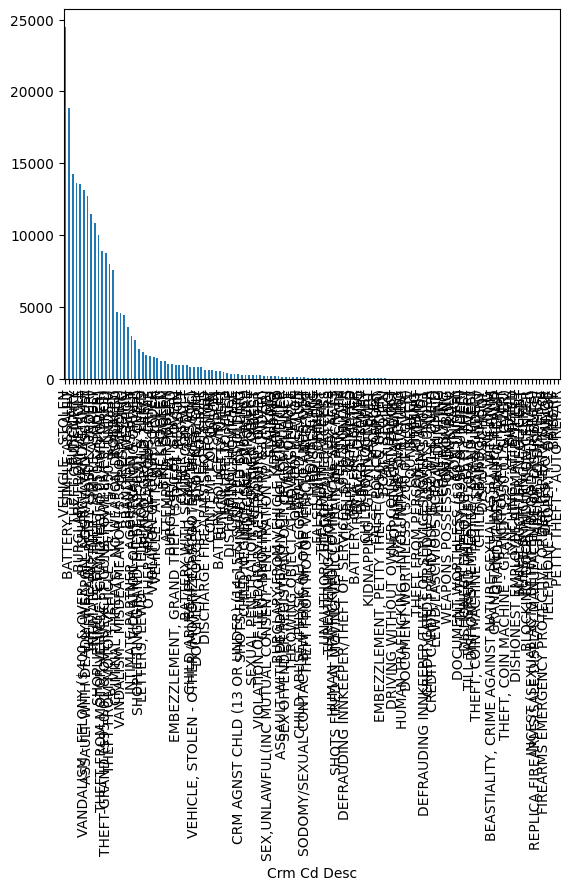

In [19]:
fig, ax = plt.subplots()

crime_data['Crm Cd Desc'].value_counts().plot(ax=ax, kind='bar')


<Axes: xlabel='Zipcode'>

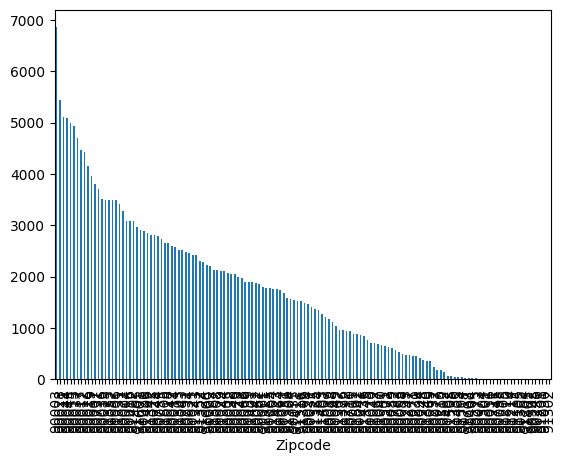

In [44]:
crime_data['Zipcode'].value_counts().plot( kind='bar')


In [21]:
crime_data['Crm Cd Desc'].nunique()

135

# Define Categories (violent, property, fraud, to_ignore, other)

In [41]:
# as of UCR-COMPSTAT062618.doc
violent_crimes = [110, 113, 121, 122, 815, 820, 821, 210, 220, 230, 231, 235, 236, 250, 251, 761, 926, 435, 436, 437, 622, 623, 624, 625, 626, 627, 647, 761, 763, 928, 930, 929, 910, 920, 648, 813, 860, 237, 434, 439, 806, 237, 943, 760, 954, 812, 922, 822, 762, 814, 870, 830, 840]

property_crimes = [310, 320, 510, 520, 433, 330, 331, 410, 420, 421, 350, 351, 352, 353, 450, 451, 452, 453, 341, 343, 345, 440, 441, 442, 443, 444, 445, 470, 471, 472, 473, 474, 475, 480, 485, 487, 491, 110, 113, 121, 122, 815, 820, 821, 210, 220, 230, 231, 235, 236, 250, 251, 761, 926, 310, 320, 510, 520, 433, 330, 331, 410, 420, 421, 350, 351, 352, 353, 450, 451, 452, 453, 341, 343, 345, 440, 441, 442, 443, 444, 445, 470, 471, 472, 473, 474, 475, 480, 485, 487, 491, 662, 354, 664, 668, 670, 522, 446, 349, 347]

fraud_crimes = [666, 649, 653, 654, 660, 651, 652, 950]

# TO IGNORE
vandalism = [740, 745]
dumping = [949]
to_ignore = vandalism + dumping


Other_crimes = [944, 901, 888, 904, 956, 940, 900, 946, 438, 810, 753, 933, 951, 850, 845, 890, 921, 948, 932, 943, 755, 756, 880, 884, 924, 94, 903, 886, 661, 949, 902, 882, 805, 432, 931, 865, 942] # Conspiracy
total_list = violent_crimes + property_crimes + vandalism + Other_crimes  + fraud_crimes


crime_data[~crime_data['Crm Cd'].isin(total_list)][['Crm Cd', 'Crm Cd Desc']].drop_duplicates()

,Crm Cd,Crm Cd Desc
